In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")

In [3]:
tmp = list(train_df["text"].values)

In [4]:
train_df['label'].value_counts()

question    3266
answer      2802
other        902
header       441
Name: label, dtype: int64

In [5]:
train_df.isna().sum()

box          0
text       163
label        0
words        0
linking      0
id           0
file         0
dtype: int64

In [6]:
test_df.isna().sum()

box         0
text       62
label       0
words       0
linking     0
id          0
file        0
dtype: int64

In [7]:
train_df[train_df['text'].isna()]

,box,text,label,words,linking,id,file
11,"[545, 21, 647, 117]",NaN,other,"[{'box': [545, 21, 647, 117], 'text': ''}]",[],11,71206427
16,"[550, 216, 703, 325]",NaN,other,"[{'text': '', 'box': [550, 222, 642, 302]}, {'...",[],16,71206427
247,"[496, 204, 502, 210]",NaN,question,"[{'box': [496, 204, 502, 210], 'text': ''}]",[],5,0001209043
340,"[529, 149, 551, 159]",NaN,other,"[{'box': [529, 149, 551, 159], 'text': ''}]",[],26,0060262650
341,"[552, 151, 574, 161]",NaN,other,"[{'box': [552, 151, 574, 161], 'text': ''}]",[],27,0060262650
...,...,...,...,...,...,...,...
7281,"[260, 791, 281, 805]",NaN,other,"[{'box': [260, 791, 281, 805], 'text': ''}]",[],36,0001463282
7282,"[243, 792, 260, 807]",NaN,other,"[{'box': [243, 792, 260, 807], 'text': ''}]",[],37,0001463282
7335,"[230, 658, 376, 690]",NaN,answer,"[{'text': '', 'box': [230, 658, 262, 680]}, {'...","[[83, 90]]",90,0001463282
7352,"[203, 817, 216, 831]",NaN,other,"[{'box': [203, 817, 216, 831], 'text': ''}]",[],6,80310840a


In [8]:
train_df[train_df['text'].isna()]['label'].value_counts()

answer      81
other       69
question    13
Name: label, dtype: int64

### Assumption
If the column `linking` is not null, then label must be `question` or `answer`, otherwise it must be other or header. However I am not using this assumption right now, since I assume that `linking` is more expensive than `label` to label manually, so using it defeats the purpose of saving costs.

In [9]:
train_df[train_df['linking'].map(len) > 2].label.value_counts()

answer      2802
question    2566
header       248
other         39
Name: label, dtype: int64

In [10]:
train_df[(train_df['linking'].map(len) > 2) & (train_df['label'] == 'header')]

,box,text,label,words,linking,id,file
9,"[101, 559, 196, 574]",SIGNATURES:,header,"[{'box': [101, 559, 196, 574], 'text': 'SIGNAT...","[[9, 24], [9, 25], [9, 26], [9, 27], [9, 28]]",9,71206427
37,"[216, 648, 289, 661]",Implement:,header,"[{'box': [216, 648, 289, 661], 'text': 'Implem...","[[6, 34], [6, 35], [6, 36]]",6,0001123541
75,"[487, 119, 624, 133]",SUBMISSION DATE,header,"[{'text': 'SUBMISSION', 'box': [487, 119, 578,...","[[4, 5], [4, 6], [4, 7], [4, 8]]",4,92039708_9710
90,"[94, 786, 661, 806]",Average Coupon Buydown Value On Targeted Brand...,header,"[{'text': 'Average', 'box': [94, 786, 144, 801...","[[19, 20], [19, 21]]",19,92039708_9710
149,"[21, 216, 67, 229]",REGION:,header,"[{'box': [21, 216, 67, 229], 'text': 'REGION:'}]","[[7, 9], [7, 11]]",7,81619511_9513
...,...,...,...,...,...,...,...
7261,"[75, 278, 150, 293]",PROJECTED:,header,"[{'box': [75, 278, 150, 293], 'text': 'PROJECT...","[[16, 61], [16, 64], [16, 65], [16, 67]]",16,0001463282
7292,"[311, 124, 496, 139]",Research Request Attached:,header,"[{'text': 'Research', 'box': [311, 126, 368, 1...","[[47, 3], [47, 6]]",47,0001463282
7294,"[80, 165, 299, 181]",Competitive Proposals Obtained:,header,"[{'text': 'Competitive', 'box': [80, 166, 160,...","[[49, 10], [49, 11], [49, 13], [49, 53], [49, ...",49,0001463282
7314,"[318, 275, 467, 294]",Summary of MRD Budget,header,"[{'text': 'Summary', 'box': [318, 277, 370, 29...","[[69, 70], [69, 71], [69, 72], [69, 73], [69, ...",69,0001463282


![](training_data/images/0001463282.png)

### Assumption
Empty string can have many different labels. Since they are only 163/7411 cases, we will ignore them for now.

In [11]:
train_df[train_df['text'].isna()]['file'].value_counts()

82254638         10
00283813          7
89368010          6
12603270          6
71366499          5
                 ..
0011859695        1
00851772_1780     1
80707440_7443     1
0000989556        1
92314414          1
Name: file, Length: 72, dtype: int64

In [12]:
train_df[(train_df['file'] == '82254638') & (train_df['text'].isna())]

,box,text,label,words,linking,id,file
3857,"[221, 454, 246, 465]",NaN,answer,"[{'box': [221, 454, 246, 465], 'text': ''}]","[[42, 6]]",6,82254638
3858,"[223, 468, 247, 482]",NaN,answer,"[{'box': [223, 468, 247, 482], 'text': ''}]","[[43, 7]]",7,82254638
3859,"[612, 451, 647, 472]",NaN,answer,"[{'box': [612, 451, 647, 472], 'text': ''}]","[[51, 8]]",8,82254638
3873,"[352, 381, 503, 423]",NaN,other,"[{'box': [352, 381, 503, 423], 'text': ''}]",[],22,82254638
3874,"[219, 483, 246, 494]",NaN,other,"[{'box': [219, 483, 246, 494], 'text': ''}]",[],23,82254638
3875,"[413, 494, 445, 508]",NaN,other,"[{'box': [413, 494, 445, 508], 'text': ''}]",[],24,82254638
3876,"[415, 468, 447, 479]",NaN,other,"[{'box': [415, 468, 447, 479], 'text': ''}]",[],25,82254638
3877,"[608, 437, 646, 451]",NaN,other,"[{'box': [608, 437, 646, 451], 'text': ''}]",[],26,82254638
3879,"[415, 439, 449, 452]",NaN,other,"[{'box': [415, 439, 449, 452], 'text': ''}]",[],28,82254638
3913,"[469, 694, 700, 769]",NaN,other,"[{'text': '', 'box': [649, 696, 664, 710]}, {'...",[],62,82254638


![](training_data/images/82254638.png)

### Assumption:
Drop question with one word

In [13]:
train_df[train_df['text'].str.len()==1]['label'].value_counts()

answer      208
other        62
question     26
header        1
Name: label, dtype: int64

In [14]:
train_df[(train_df['text'].str.len()==1) & (train_df['label']=='header')]

,box,text,label,words,linking,id,file
4955,"[568, 168, 578, 178]",☑,header,"[{'box': [568, 168, 578, 178], 'text': '☑'}]","[[2, 1]]",2,00851772_1780


In [15]:
one_word_question_slice = train_df[(train_df['text'].str.len()==1) & (train_df['label']=='question')]
one_word_question_slice.sort_values('file')

,box,text,label,words,linking,id,file
4768,"[219, 316, 225, 327]",:,question,"[{'box': [219, 316, 225, 327], 'text': ':'}]",[],1,0000971160
7169,"[365, 212, 380, 222]",6,question,"[{'box': [365, 212, 380, 222], 'text': '6'}]",[],10,0011906503
7167,"[365, 237, 377, 252]",7,question,"[{'box': [365, 237, 377, 252], 'text': '7'}]",[],8,0011906503
7166,"[74, 236, 85, 247]",4,question,"[{'box': [74, 236, 85, 247], 'text': '4'}]",[],7,0011906503
7165,"[74, 221, 84, 235]",3,question,"[{'box': [74, 221, 84, 235], 'text': '3'}]",[],6,0011906503
7164,"[74, 207, 84, 219]",2,question,"[{'box': [74, 207, 84, 219], 'text': '2'}]",[],5,0011906503
7163,"[75, 193, 85, 204]",1,question,"[{'box': [75, 193, 85, 204], 'text': '1'}]",[],4,0011906503
7168,"[364, 197, 375, 211]",5,question,"[{'box': [364, 197, 375, 211], 'text': '5'}]",[],9,0011906503
2049,"[114, 850, 125, 862]",-,question,"[{'box': [114, 850, 125, 862], 'text': '-'}]",[],20,0012529295
4621,"[476, 205, 487, 226]",$,question,"[{'box': [476, 205, 487, 226], 'text': '$'}]",[],8,0012602424


In [16]:
sorted(list(set(one_word_question_slice['file'])))

['0000971160',
 '0011906503',
 '0012529295',
 '0012602424',
 '0060270727',
 '11508234',
 '13149651',
 '716552',
 '81749056_9057',
 '87672097',
 '92081358_1359']

![](training_data/images/0000971160.png)

`:` as question, should be the part before that

---
![](training_data/images/0011906503.png)

Numbers as question, which is misguided

---
![](training_data/images/0012529295.png)

`-` as question

---

![](training_data/images/0012602424.png)

`$` as question

---

![](training_data/images/0060270727.png)

`-` as question

---

![](training_data/images/11508234.png)
`$` as question

---

![](training_data/images/13149651.png)

Square as question

![](training_data/images/716552.png)
![](training_data/images/81749056_9057.png)
![](training_data/images/87672097.png)
![](training_data/images/92081358_1359.png)

`%` as question

In [81]:
train_df.columns

Index(['box', 'text', 'label', 'words', 'linking', 'id', 'file'], dtype='object')

In [82]:
non_nan_train_df = train_df.dropna()

In [83]:
non_nan_train_df[non_nan_train_df['text'].str.contains('?', regex=False)]['label'].value_counts()

question    10
header       5
Name: label, dtype: int64

In [84]:
non_nan_train_df[non_nan_train_df['text'].str.contains(':', regex=False)]['label'].value_counts()

question    963
header      123
answer       27
other        22
Name: label, dtype: int64

In [85]:
non_nan_train_df[non_nan_train_df['text'].str.contains('*', regex=False)]['label'].value_counts()

answer      34
question    22
other       12
header       2
Name: label, dtype: int64

In [86]:
from ast import literal_eval

In [87]:
box_to_coordinates = pd.DataFrame(non_nan_train_df['box'].map(literal_eval).tolist(), 
                                  columns=['x1', 'y1', 'x2', 'y2'], index=non_nan_train_df.index)

In [89]:
non_nan_train_df_w_coord = pd.concat([non_nan_train_df, box_to_coordinates], axis=1)

In [90]:
non_nan_train_df_w_coord.isna().sum()

box        0
text       0
label      0
words      0
linking    0
id         0
file       0
x1         0
y1         0
x2         0
y2         0
dtype: int64

<AxesSubplot: >

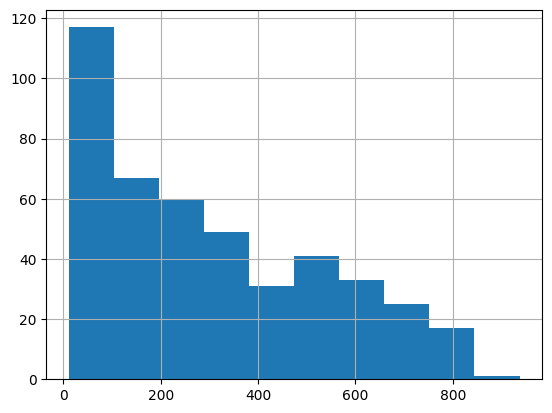

In [94]:
non_nan_train_df_w_coord[non_nan_train_df_w_coord['label']=='header']['y1'].hist()

<AxesSubplot: >

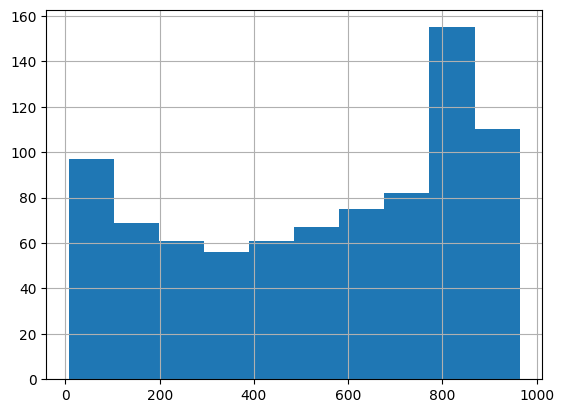

In [99]:
non_nan_train_df_w_coord[non_nan_train_df_w_coord['label']=='other']['y1'].hist()

<AxesSubplot: >

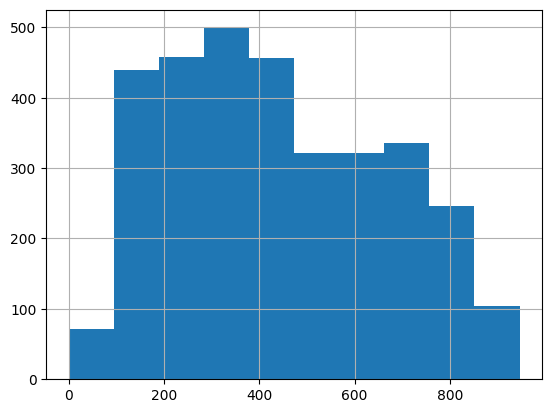

In [101]:
non_nan_train_df_w_coord[non_nan_train_df_w_coord['label']=='question']['y1'].hist()

<AxesSubplot: >

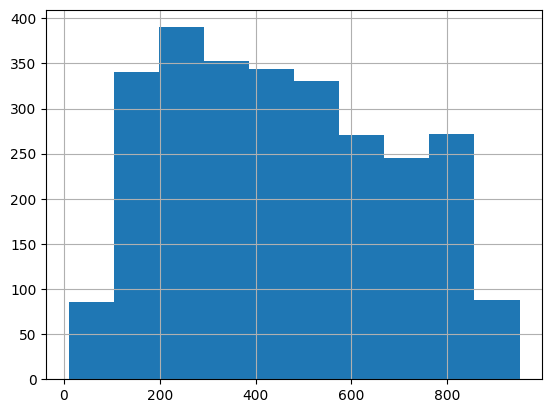

In [100]:
non_nan_train_df_w_coord[non_nan_train_df_w_coord['label']=='answer']['y1'].hist()